In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Reads in all sheets in Riket / 0

## A)

In [3]:
df_english= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_math= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_swedish= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_swedish2= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_rapport= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")

In [4]:
dfs= {
    "English": df_english,
    "Math": df_math,
    "Swedish": df_swedish,
    "Swedish2": df_swedish2,
    "Report": df_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_english= dfs["English"]
df_math= dfs["Math"]
df_swedish= dfs["Swedish"]
df_swedish2= dfs["Swedish2"]
df_rapport= dfs["Report"]

C:\Users\milto\AppData\Local\Temp\ipykernel_9332\3462153218.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


## Collections

In [5]:
dfs= [
    df_english,
    df_math,
    df_swedish,
    df_swedish2
]
colors = {
    "RED1": "#D60C00",
    "YELLOW1": "#F4D000",
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "BLUE3": "#c1e0e6",
    "GREEN1": "#4DF400",
    "GRAY1": "#292929",
    "GRAY2": "#cacaca",
}
bar_colors = [
    colors["BLUE1"],
    colors["RED1"],
    colors["YELLOW1"],
    colors["GREEN1"]
]
subjects = [
    "English",
    "Math",
    "Swedish",
    "Swedish2"
]
total_points_persubject= [df.loc[0, "Totalt(Poäng)"]for df in dfs]

## B)

In [6]:
girls_f= round(df_math.loc[0, "Flickor(A-F)"]- df_math.loc[0, "Flickor(A-F)"]* (df_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_math.loc[0, "Pojkar(A-F)"]- df_math.loc[0, "Pojkar(A-F)"]* (df_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

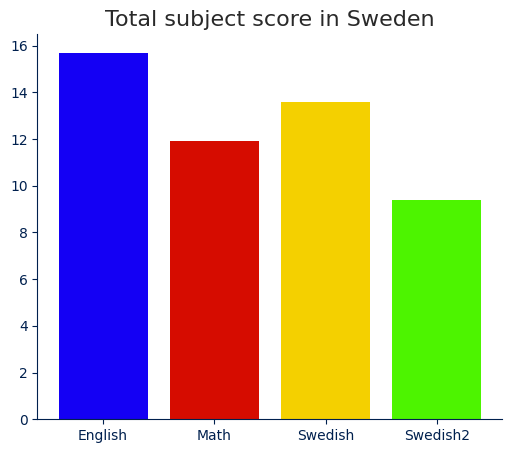

In [7]:
fig, ax= plt.subplots(figsize= (6, 5))
ax.bar(subjects, total_points_persubject, color= bar_colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_title("Total subject score in Sweden", color= colors["GRAY1"], fontsize= 16)
fig.savefig("Visualizations/plot_0.C.png")

## D)

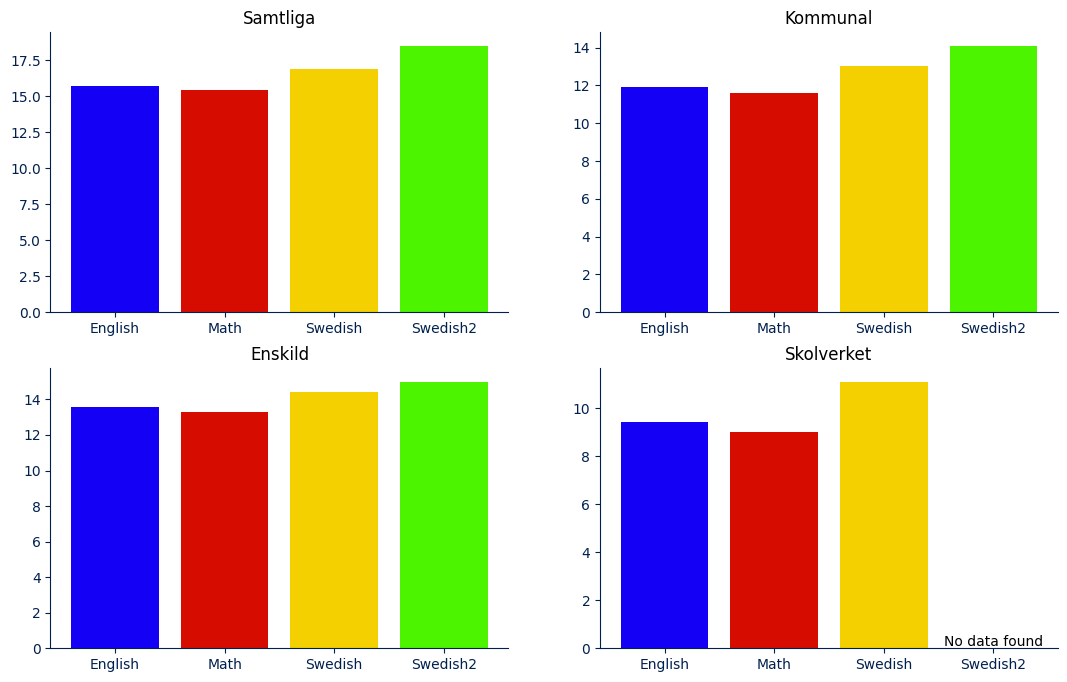

In [8]:
huvudmann= ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
fig, axs= plt.subplots(int(len(huvudmann)/2), int(len(huvudmann)/2), figsize= (13, 8))


for ax, df, huvudman in zip(axs.flatten(), dfs, huvudmann):

    ax.bar(subjects, df["Totalt(Poäng)"], color= bar_colors)
    
    for x, point in enumerate(df["Totalt(Poäng)"]):
        if point <= 0:
            ax.text(x-0.45, 0.1, "No data found")
    ax.set(title= huvudman)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(colors["BLUE2"])
    ax.spines["left"].set_color(colors["BLUE2"])
    ax.tick_params(colors= colors["BLUE2"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
fig.savefig("Visualizations/plot_0.D.png")

# Betyg och prov / 1

## A)

In [9]:
df_1a= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1A", skiprows= 9)
df_1b= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B", skiprows= 7)

In [10]:
df_1a.columns = [
    "Variabel",
    "Totalt",
    "Flickor",
    "Pojkar",
    "Totalt(A-F)",
    "Flickor(A-F)",
    "Pojkar(A-F)",
    "Totalt(A-E)",
    "Flickor(A-E)",
    "Pojkar(A-E)"
]
df_1b.columns= [
    "Variabel",
    "Totalt(Genomsnitt merit 16 ämnen)",
    "Flickor(Genomsnitt merit 16 ämnen)",
    "Pojkar(Genomsnitt merit 16 ämnen)",
    "Totalt(Genomsnitt merit 17 ämnen)",
    "Flickor(Genomsnitt merit 17 ämnen)",
    "Pojkar(Genomsnitt merit 17 ämnen)",
    "Totalt(% elever med minst ett F)",
    "% Flickor med minst ett F",
    "% Pojkar med minst ett F"
]

df_1a = df_1a.dropna().reset_index(drop= True)
df_1b = df_1b.dropna().reset_index(drop= True)

In [11]:
df_procentage = pd.melt(
    df_1b[0:5],
    id_vars=["Variabel"],
    var_name="Kategori",
    value_vars=[
        "Totalt(% elever med minst ett F)",
        "% Flickor med minst ett F",
        "% Pojkar med minst ett F",
    ],
    value_name="Andel F",
)

color_map = {
    "Totalt(% elever med minst ett F)": "rgba(0, 0, 0, 0.25)",
    "% Flickor med minst ett F": "rgba(0, 0, 0, 1)",
    "% Pojkar med minst ett F": "rgba(0, 0, 0, 1)",
}

fig = px.line(
    df_procentage,
    x="Variabel",
    y="Andel F",
    color="Kategori",
    line_dash="Kategori",
    markers="o",
    labels={
        "Andel F": "Andel av elever har underkänt i minst ett ämne",
        "Variabel": "Årtal",
    },
    text="Andel F",
    color_discrete_map=color_map,
)

fig.update_layout(
    plot_bgcolor=colors["BLUE3"],
)

fig.update_traces(
    line=dict(width=3),
    textposition="top center",
)
fig.update_yaxes(
    showgrid= True,
    gridcolor= colors["GRAY1"]
)

pio.write_html(fig, "Visualizations/plot_1.A.html")
fig.show()

## B)

In [12]:
df_mean16 = pd.melt(
    df_1b[0:5],
    id_vars="Variabel",
    var_name="Kategori",
    value_vars={
        "Totalt(Genomsnitt merit 16 ämnen)",
        "Flickor(Genomsnitt merit 16 ämnen)",
        "Pojkar(Genomsnitt merit 16 ämnen)",
    },
    value_name="Meritvärde",
)

fig = px.line(
    df_mean16,
    x="Variabel",
    y="Meritvärde",
    color="Kategori",
    labels={"Variabel": "Årtal"},
    markers= True
)

fig.update_layout(
    title="Genomsnittligt meritvärde för pojkar, flickor och totalt utöver 16 ämnen",
    title_font=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=30,
    ),
    title_x=0.45,
    title_xanchor="center",
    title_yanchor="top",
    plot_bgcolor= "white"
)

fig.update_traces(
    line=dict(width=2),
    textposition="top center",
    marker=dict(
        size=8,
    ),
)

fig.update_xaxes(
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=23,
    ),
    tickfont=dict(
        family="Ariel",
        size=15,
        color=colors["BLUE2"],
    ),
)

fig.update_yaxes(
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=23,
    ),
    tickfont=dict(
        family="Ariel",
        color=colors["BLUE2"],
        size=15,
    ),
    showgrid= True,
    gridcolor= colors["GRAY2"]
)

pio.write_html(fig, "Visualizations/plot_1.B.html")
fig.show()

## C)

In [13]:
df_own_variables = pd.concat([df_1b.iloc[10:12], df_1b.iloc[18:23]])
df_own_variables_melted = pd.melt(
    df_own_variables,
    id_vars="Variabel",
    var_name="Kategori",
    value_vars={
        "Totalt(Genomsnitt merit 17 ämnen)",
        "Flickor(Genomsnitt merit 17 ämnen)",
        "Pojkar(Genomsnitt merit 17 ämnen)",
    },
    value_name="Meritvärde",
    
)
fig = px.bar(
    df_own_variables_melted,
    x="Variabel",
    y="Meritvärde",
    color="Kategori",
    barmode= "group"
)
fig.update_layout(
    plot_bgcolor="white",
    title="Genomsnittliga meritvärdet baserat på 17 ämnen med olika variabler, uppdelat på totalt, pojkar och flickor",
    title_x=0.45,
    title_xanchor="center",
    titlefont=dict(
        family="Ariel",
        color=colors["GRAY1"],
        size=30,
    ),
)
fig.update_xaxes(
    color=colors["BLUE2"],
    title_font=dict(
        family="Comic Sans MS",
        color=colors["GRAY1"],
        size=18,
    ),
    tickfont=dict(
        family="Comic Sans MS",
        size=13,
    ),
)
fig.update_yaxes(
    color=colors["BLUE2"],
    title_font=dict(
        family="Comic Sans MS",
        color=colors["GRAY1"],
        size=18,
    ),
)
pio.write_html(fig, "Visualizations/plot_1.C.html")
fig.show()

## 2.A)

In [14]:
df_gymnasie= pd.read_excel("../Data/Data_processing/Gymnasieskola-Jämförelse_av_betygsresultat_över_tid_2023_Län.xlsx", skiprows= 7)

In [15]:
df_graduated= df_gymnasie[(df_gymnasie["Uppgift"] == "Genomsnittlig betygspoäng") & (df_gymnasie["Typ av huvudman"] == "Kommunal")].reset_index(drop= True)

df_hs_graduate = pd.melt(
    df_graduated,
    id_vars= {"Län"},
    value_vars= {
        "2022/23",
        "2021/22",
        "2020/21",
        "2019/20",
        "2018/19",
        "2017/18",
        "2016/17",
        "2015/16",
        "2014/15",
        "2013/14",
        },
    var_name= "Årtal",
    value_name= "Betygpoäng"
)

df_hs_graduate.sort_values(by= "Årtal", ascending= True, inplace= True)
df_hs_graduate.reset_index(drop= True, inplace= True)
df_hs_graduate

,Län,Årtal,Betygpoäng
0,Östergötlands län,2013/14,13.7
1,Örebro län,2013/14,13.7
2,Dalarnas län,2013/14,14
3,Gotlands län,2013/14,14.2
4,Gävleborgs län,2013/14,13.8
...,...,...,...
205,Västernorrlands län,2022/23,13.9
206,Västmanlands län,2022/23,14.1
207,Västra Götalands län,2022/23,14.3
208,Östergötlands län,2022/23,14.4


In [16]:
pivot_df = df_hs_graduate.pivot_table(index='Län', columns='Årtal', values='Betygpoäng')
column_years= pivot_df.columns.tolist()

diff= pivot_df[column_years[-1]] - pivot_df[column_years[0]]

In [17]:
##df_sorted_highest= df_hs_graduate.groupby("Län")["Betygpoäng"].mean().sort_values(ascending= False)
top_5_diff= diff.sort_values(ascending= False).iloc[:5]
top_5_diff

Län
Stockholms län       0.8
Östergötlands län    0.7
Kalmar län           0.7
Uppsala län          0.6
Skåne län            0.6
dtype: object

## Genomsnittliga betygpoäng för kommunal skolor i sveriges län

In [18]:
fig = px.line(
    df_hs_graduate,
    x="Årtal",
    y="Betygpoäng",
    color="Län",
    markers= True,
)
for trace in fig.data:
    if trace.name in top_5_diff:
        trace.opacity= 1
    else:
        trace.opacity= 0.15
        trace.text= None
fig.update_layout(
    title="Visar Genomsnittliga betygpoäng för kommunala skolor i Sveriges län 2013-2023",
    title_x=0.45,
    title_font=dict(
        family="Calirbi",
        size=26,
        color=colors["GRAY1"],
    ),
    plot_bgcolor= "white",
)
fig.update_yaxes(
    title_font=dict(
        family="Ariel",
        size=20,
        color=colors["BLUE2"],
    ),
    showgrid= True,
    gridcolor= colors["GRAY2"]
)
fig.update_xaxes(
    title_font=dict(
        family="Ariel",
        size=20,
        color=colors["BLUE2"],
    ),
    tickfont=dict(
        family="Calibi",
        color=colors["GRAY1"],
        size=15,
    ),
)
fig.update_traces(
    line= dict(
        width= 3,
    ),
    marker= dict(
        size= 10
    ),
)
fig.add_annotation(
    text= "Top 5 ökning under åren är ifyllda",
    x= 1,
    y= 15,
    yanchor= "top",
    showarrow= False,
    font= dict(
        family= "Calibri",
        color= colors["GRAY1"],
        size= 20
    ),
)

pio.write_html(fig, "Visualizations/plot_2.A.html")
fig.show()

## 2.B)

In [19]:
df_costs_22_raw= pd.read_excel("../Data/Data_processing/Gymnasieskola - Kostnader per län 2022 Län.xlsx", skiprows= 7)
df_students_raw= pd.read_excel("../Data/Data_processing/Gymnasieskola - Antal elever 2022 Län.xlsx", skiprows= 7)

In [20]:
df_students22_23= df_students_raw[df_students_raw["Typ av huvudman"]== "Kommunal"].drop(columns= "Läns-kod").reset_index(drop= True)
df_costs_22= df_costs_22_raw.drop(columns= "Läns-kod").reset_index(drop= True)

In [21]:
df_costs_22.head()

,Län,Typ av huvudman,Genomsnittligt elevantal,Totalt,Undervisning,Totalt per elev,Undervisning per elev,Lokaler per elev,Måltider per elev,Lärverktyg per elev,Elevhälsa per elev,Övrigt per elev
0,Blekinge län,Kommunal,5068,710935,379051,140300,74800,20800,7700,10300,3670,23100
1,Dalarnas län,Kommunal,7330,1075999,574914,146800,78400,24500,6300,12900,3740,20900
2,Gotlands län,Kommunal,1557,191835,95537,123200,61400,29200,6100,13000,1310,12300
3,Gävleborgs län,Kommunal,6431,816221,422936,126900,65800,20700,6100,12000,3260,19100
4,Hallands län,Kommunal,9892,1251589,655253,126500,66200,19400,5200,9300,3710,22600


In [22]:
df_graduated.head()

,Län,Länskod,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Blekinge län,10,Kommunal,Genomsnittlig betygspoäng,14,14.3,14.3,14.3,14.3,14.2,14.3,14.1,14,14
1,Dalarnas län,20,Kommunal,Genomsnittlig betygspoäng,14.1,14.2,14.3,14.3,14.1,14.2,14.2,14,14,14
2,Gotlands län,9,Kommunal,Genomsnittlig betygspoäng,14.2,14.5,14.9,14.6,14.7,14.3,14.4,14.3,14.2,14.2
3,Gävleborgs län,21,Kommunal,Genomsnittlig betygspoäng,14.3,14.1,14.3,14.2,14,14.2,14,13.9,13.8,13.8
4,Hallands län,13,Kommunal,Genomsnittlig betygspoäng,14.4,14.4,14.4,14.4,14.2,14.2,14.1,14,14.1,14


In [23]:
df_merged2022= pd.merge(
    df_costs_22[["Län", "Totalt per elev"]],
    df_graduated[["Län", "2022/23"]],
    on= "Län",
)
df_merged2022.head()

,Län,Totalt per elev,2022/23
0,Blekinge län,140300,14
1,Dalarnas län,146800,14.1
2,Gotlands län,123200,14.2
3,Gävleborgs län,126900,14.3
4,Hallands län,126500,14.4


In [24]:
df_melted_merge= pd.melt(
    df_merged2022,
    id_vars= "Län",
    value_vars= ["Totalt per elev", "2022/23",],
    var_name= "Kategori",
    value_name= "Value"
)
df_melted_merge["Kategori"].replace({"2022/23": "Betygpoäng"},inplace= True)

C:\Users\milto\AppData\Local\Temp\ipykernel_9332\358418442.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
fig = make_subplots(
    specs=[[{"secondary_y": True}]]
)

#Primary
fig.add_trace(
    go.Scatter(
        x= df_melted_merge[df_melted_merge["Kategori"]== "Totalt per elev"]["Län"],
        y= df_melted_merge[df_melted_merge["Kategori"]== "Totalt per elev"]["Value"],
        name= "Totalt per elev",
        mode= "lines+markers",
        line= dict(
            dash= "solid"
        )
    ),
    secondary_y= True
)

#secondary
fig.add_trace(
    go.Scatter(
        x= df_melted_merge[df_melted_merge["Kategori"]== "Betygpoäng"]["Län"],
        y= df_melted_merge[df_melted_merge["Kategori"]== "Betygpoäng"]["Value"],
        name= "Betygspoäng",
        mode= "lines+markers",
        line= dict(
            dash= "dash",
        )
    ),
    secondary_y= False
)

fig.update_yaxes(
    secondary_y= True,
    title= "Kostnad per elev för år 2022",
    
    title_font= dict(
            family="Calibri",
            size= 20
        ),
    tickfont=dict(
        family="Calibri",
        color=colors["BLUE2"],
        size=15,
    ),
)

fig.update_yaxes(
    secondary_y= False,
    title= "Genomsnittligt betygpoäng för år 2022",
    title_font= dict(
            family="Calibri",
            size= 20
        ),
    
    range= [0, 17],
    tickfont= dict(
        family= "Calibri",
        size= 15,
        color= colors["BLUE2"]
    ),
)

fig.update_xaxes(
    tickfont= dict(
        family= "Calibri",
        size= 15,
        color= colors["BLUE2"]
    )
)

fig.update_traces(
    line= dict(
        width= 3
    ),
    marker= dict(
        size= 10
    )
)

fig.update_layout(
    plot_bgcolor= "white",
    title= "Jämnsförelse i sveriges län, med genomsnittliga betyg och hur mycket pengar de lägger per elev",
    title_x= 0.45,
    title_font= dict(
        family= "Ariel",
        size= 25,
    ),
    
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"],
    ),
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"],
    )
)
fig.show()